In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

#會有memory error發生

In [3]:
Dict = {}
A = app_train.iloc[:,1:2]
for i in list(range(2,232,10)):
    B = app_train.iloc[:,i:i+9]
    C = pd.concat([A, B], axis = 1)
    D = C.corr()['TARGET']
    
    for j in range(len(D)):
        Dict[C.corr()['TARGET'].index[j]] = C.corr()['TARGET'][j]
        
E = pd.concat([app_train.iloc[:,0:2], app_train.iloc[:,241:244]], axis = 1)
E = E.corr()['TARGET']
for j in range(len(D)):
    Dict[C.corr()['TARGET'].index[j]] = C.corr()['TARGET'][j]
    
app_train_2 = pd.DataFrame.from_dict(Dict, orient='index')
app_train_2 ["abs"] = app_train_2[0].abs()

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [70]:
app_train_2.sort_values(by=['abs'])
min15 = app_train_2.sort_values(by=['abs']).iloc[0:15,:]
min15value = app_train_2.sort_values(by=['abs']).iloc[0:15,0]
max15 = app_train_2.sort_values(by=['abs']).iloc[-16:-1,:]
max15value = app_train_2.sort_values(by=['abs']).iloc[-16:-1,0]

print ("min15")
for i in range(len(min15)):
    print(str(min15.index[i]) + ": " + str(min15value[i]))
    
print ("max15")
for i in range(len(max15)):
    print(str(max15.index[i]) + ": " + str(max15value[i]))


min15
ORGANIZATION_TYPE_Industry: type 7: -9.405271150827057e-05
ORGANIZATION_TYPE_Advertising: 0.00011748220212754732
ORGANIZATION_TYPE_Legal Services: -0.00023598906873819047
NAME_HOUSING_TYPE_Co-op apartment: -0.00031236692480246167
FLAG_DOCUMENT_5: -0.0003157774166440568
ORGANIZATION_TYPE_Business Entity Type 1: 0.00033865065123206065
FLAG_CONT_MOBILE: 0.0003701268023512289
OCCUPATION_TYPE_Realty agents: -0.00039357160127507357
WEEKDAY_APPR_PROCESS_START_THURSDAY: 0.0004458867736086756
NAME_TYPE_SUITE_Group of people: 0.00045156763306120236
ORGANIZATION_TYPE_Housing: -0.00046423957385155853
FLAG_MOBIL: 0.0005343955790302037
ORGANIZATION_TYPE_Industry: type 6: -0.00065165269207535
ORGANIZATION_TYPE_Telecom: -0.0007118068865165538
NAME_FAMILY_STATUS_Unknown: -0.0007557507043526767
max15
ORGANIZATION_TYPE_XNA: -0.04598707841544573
NAME_INCOME_TYPE_Pensioner: -0.04620942278701308
REG_CITY_NOT_WORK_CITY: 0.050994464367959576
DAYS_ID_PUBLISH: 0.05145717260719229
CODE_GENDER_F: -0.0547040

In [102]:
len(app_train[app_train["EXT_SOURCE_3"].isnull()].index)

60965

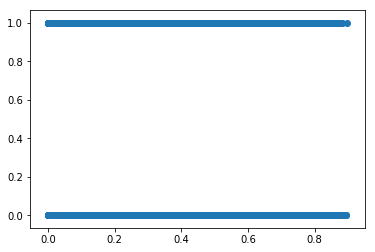

In [162]:
drop = app_train
X = drop.loc[list(drop["EXT_SOURCE_3"].dropna().index),"EXT_SOURCE_3"]
Y = drop.loc[list(drop["EXT_SOURCE_3"].dropna().index),"TARGET"]
plt.scatter(X,Y)
plt.show()